In [331]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler,  StandardScaler


In [391]:
# Загрузка данных

data = pd.read_csv("song_data.csv")
data.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [392]:
# Целевая переменная
y = data['song_popularity']

# Матрица функции x
# x = data.drop(columns=['song_name','song_popularity', 'song_duration_ms', 'key', 'audio_mode', 'speechiness', 'tempo', 'time_signature'])
x = data.drop(columns=['song_name','song_popularity'])

In [393]:
x.head()

,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [394]:
x.describe()

,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,1.883500e+04,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000
mean,2.182116e+05,0.258539,0.633348,0.644995,0.078008,5.289196,0.179650,-7.447435,0.628139,0.102099,121.073154,3.959119,0.527967
std,5.988754e+04,0.288719,0.156723,0.214101,0.221591,3.614595,0.143984,3.827831,0.483314,0.104378,28.714456,0.298533,0.244632
min,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.843395e+05,0.024100,0.533000,0.510000,0.000000,2.000000,0.092900,-9.044000,0.000000,0.037800,98.368000,4.000000,0.335000
50%,2.113060e+05,0.132000,0.645000,0.674000,0.000011,5.000000,0.122000,-6.555000,1.000000,0.055500,120.013000,4.000000,0.527000
75%,2.428440e+05,0.424000,0.748000,0.815000,0.002570,8.000000,0.221000,-4.908000,1.000000,0.119000,139.931000,4.000000,0.725000
max,1.799346e+06,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000


In [47]:
# one hot кодировка для столбца audio_mode
#x = pd.get_dummies(x, columns=['audio_mode'])
#x.head()

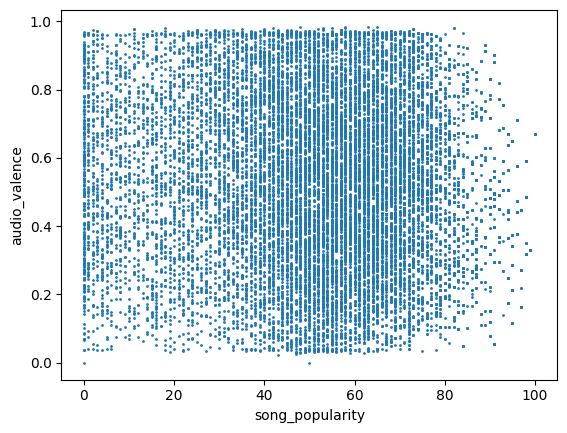

In [395]:
# Диаграмма зависимости популярности песни от уровня динамичности
plt.plot(y, x['audio_valence'], 'o', markersize=1)
plt.ylabel('audio_valence')
plt.xlabel('song_popularity')
plt.show()

In [396]:
corr = x.corr()
corr.style.background_gradient(cmap='coolwarm')

,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
song_duration_ms,1.000000,-0.097882,-0.104985,0.092688,-0.015188,-0.004615,0.016086,0.016469,-0.026328,-0.083447,0.012791,0.000264,-0.063421
acousticness,-0.097882,1.000000,-0.182500,-0.662639,0.173098,-0.002025,-0.082537,-0.557744,0.064100,-0.093574,-0.136421,-0.157177,-0.121670
danceability,-0.104985,-0.182500,1.000000,0.044373,-0.130483,0.007723,-0.090694,0.177639,-0.106539,0.213728,-0.121286,0.136391,0.332014
energy,0.092688,-0.662639,0.044373,1.000000,-0.205914,0.020416,0.167143,0.755516,-0.051605,0.062053,0.162448,0.146265,0.316742
instrumentalness,-0.015188,0.173098,-0.130483,-0.205914,1.000000,-0.009463,-0.032887,-0.390248,-0.014983,-0.081138,-0.036934,-0.069181,-0.178570
key,-0.004615,-0.002025,0.007723,0.020416,-0.009463,1.000000,-0.008193,0.010452,-0.169848,0.033639,0.003239,-0.008282,0.025356
liveness,0.016086,-0.082537,-0.090694,0.167143,-0.032887,-0.008193,1.000000,0.102450,-0.001035,0.090845,0.031876,0.013289,0.013789
loudness,0.016469,-0.557744,0.177639,0.755516,-0.390248,0.010452,0.102450,1.000000,-0.058506,0.078164,0.129938,0.119241,0.199696
audio_mode,-0.026328,0.064100,-0.106539,-0.051605,-0.014983,-0.169848,-0.001035,-0.058506,1.000000,-0.111627,0.020448,-0.024042,-0.004558
speechiness,-0.083447,-0.093574,0.213728,0.062053,-0.081138,0.033639,0.090845,0.078164,-0.111627,1.000000,0.071685,0.057162,0.011046


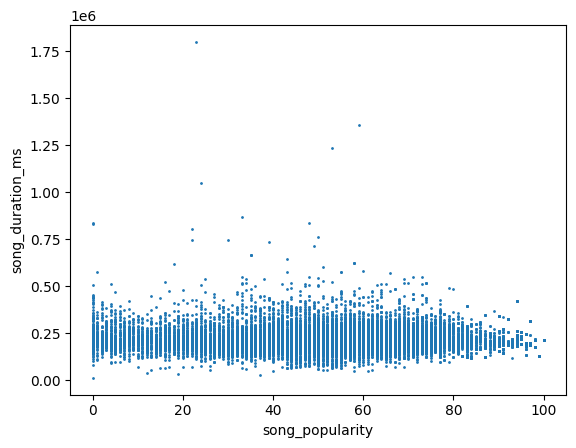

In [397]:
# Диаграмма зависимости популярности песни от уровня динамичности
plt.plot(y, x['song_duration_ms'], 'o', markersize=1)
plt.ylabel('song_duration_ms')
plt.xlabel('song_popularity')
plt.show()

In [398]:
# Полная регрессионная модель
x = sm.add_constant(x, prepend=False)
model = OLS(y, x)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:        song_popularity   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     70.09
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          7.07e-182
Time:                        00:01:39   Log-Likelihood:                -84419.
No. Observations:               18835   AIC:                         1.689e+05
Df Residuals:                   18821   BIC:                         1.690e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
song_duration_ms   -5.1e-06   2.66e-06  

In [407]:
x = data.drop(columns=['song_name','song_popularity', 'song_duration_ms', 'speechiness', 'time_signature', 'audio_mode', 'key', 'tempo'])
x = sm.add_constant(x, prepend=False)
model_step = OLS(y, x)
res = model_step.fit()

print(res.summary())


                            OLS Regression Results                            
Dep. Variable:        song_popularity   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     127.2
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          1.48e-183
Time:                        00:54:54   Log-Likelihood:                -84429.
No. Observations:               18835   AIC:                         1.689e+05
Df Residuals:                   18827   BIC:                         1.689e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
acousticness        -4.0297      0.755  

In [408]:
# Разделим выборку на обучающую и тестовую
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=50)

In [409]:
# Построение регрессионной модели на основе полного набора предикторов
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [410]:
y_pred = model.predict(x_test)
y_pred_all = model.predict(x)
print('Slope: {:.10f}'.format(model.coef_[0]))
print('Intercept: {:.2f}'.format(model.intercept_))

Slope: -3.9832063480
Intercept: 66.66


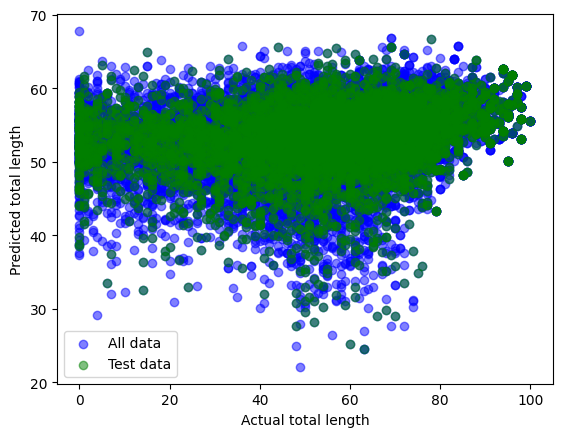

In [411]:
plt.scatter(y, y_pred_all, label="All data", color='blue', alpha=0.5)
plt.scatter(y_test, y_pred, label="Test data", color='green', alpha=0.5)
plt.xlabel("Actual total length")
plt.ylabel("Predicted total length")
plt.legend()
plt.show()


In [ ]:
########################################

In [412]:
mse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

coefficients = model.coef_
intercept = model.intercept_
print("Model coefficients:")
for feature, coef in zip(x.columns, coefficients):
    print(f"{feature}: {coef}")
print(f"Intercept: {intercept}")
print(f"Mean square error (MSE): {mse}")
print(f"Coefficient of determination (R2): {r2}")


Model coefficients:
acousticness: -3.9832063479783506
danceability: 12.400041991338792
energy: -13.491392610509521
instrumentalness: -10.158490767126912
liveness: -5.010485299849293
loudness: 0.7929651916140532
audio_valence: -7.824046905177627
const: 0.0
Intercept: 66.66020041226525
Mean square error (MSE): 21.671602644343537
Coefficient of determination (R2): 0.04021417340330269


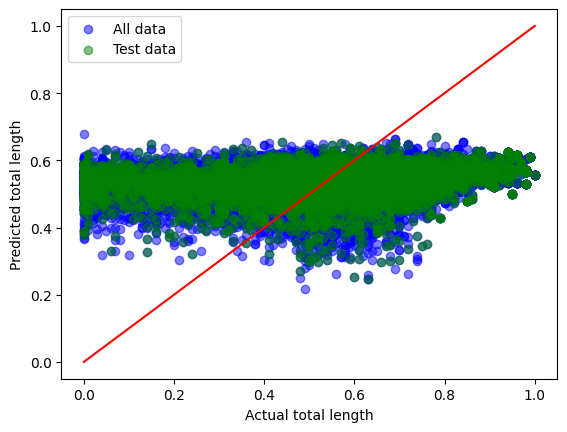

In [369]:
plt.scatter(y, y_pred_all, label="All data", color='blue', alpha=0.5)
plt.scatter(y_test, y_pred, label="Test data", color='green', alpha=0.5)
plt.plot([min(y), max(y)], [min(y), max(y)], color='red')
plt.xlabel("Actual total length")
plt.ylabel("Predicted total length")

plt.legend()
plt.show()
